Monthly Profit Trend (Recent Months):
   Month_Year         Profit
32 2017-09-01  122462.390153
33 2017-10-01  113447.169883
34 2017-11-01   67791.250205
35 2017-12-01   65837.629745
36 2018-01-01   33841.889977


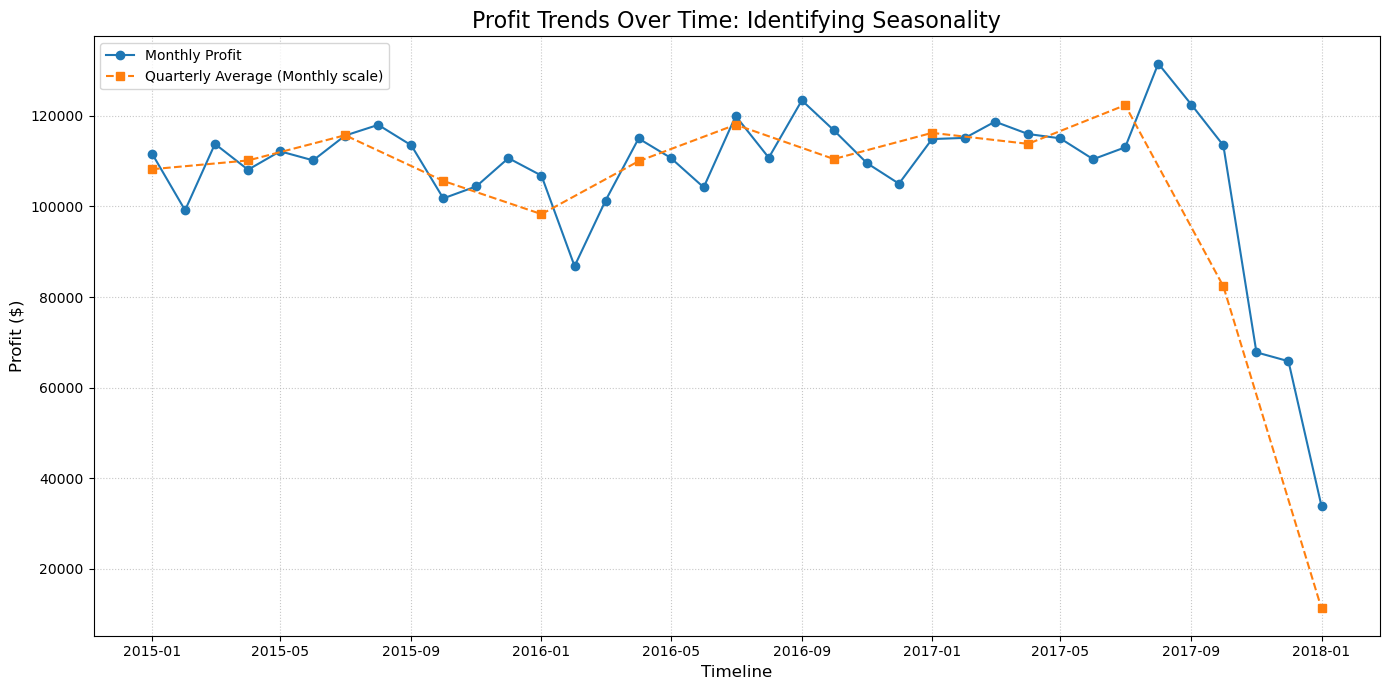

In [1]:
# VISUALIZATION

# Line Chart showing profit trends over time 

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Ensure Order_Date is datetime

df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Sort by date
df = df.sort_values('Order_Date')

# Grouping by Month

df['Month_Year'] = df['Order_Date'].dt.to_period('M')
monthly_profit = df.groupby('Month_Year')['Profit'].sum().reset_index()
monthly_profit['Month_Year'] = monthly_profit['Month_Year'].dt.to_timestamp()

# Grouping by Quarter

df['Quarter_Year'] = df['Order_Date'].dt.to_period('Q')
quarterly_profit = df.groupby('Quarter_Year')['Profit'].sum().reset_index()
quarterly_profit['Quarter_Year'] = quarterly_profit['Quarter_Year'].dt.to_timestamp()

# Visualization: Line Chart for Profit Trends (Monthly)

plt.figure(figsize=(14, 7))
plt.plot(monthly_profit['Month_Year'], monthly_profit['Profit'], marker='o', linestyle='-', color='#1f77b4', label='Monthly Profit')
plt.plot(quarterly_profit['Quarter_Year'], quarterly_profit['Profit'] / 3, marker='s', linestyle='--', color='#ff7f0e', label='Quarterly Average (Monthly scale)')

plt.title('Profit Trends Over Time: Identifying Seasonality', fontsize=16)
plt.xlabel('Timeline', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig('profit_seasonal_trends.png')

# Save the trend data

monthly_profit.to_csv('monthly_profit_trend.csv', index=False)
quarterly_profit.to_csv('quarterly_profit_trend.csv', index=False)

# Display head/tail to check patterns

print("Monthly Profit Trend (Recent Months):")
print(monthly_profit.tail())

Unique Order Regions: 23
Unique Shipping Modes: 4


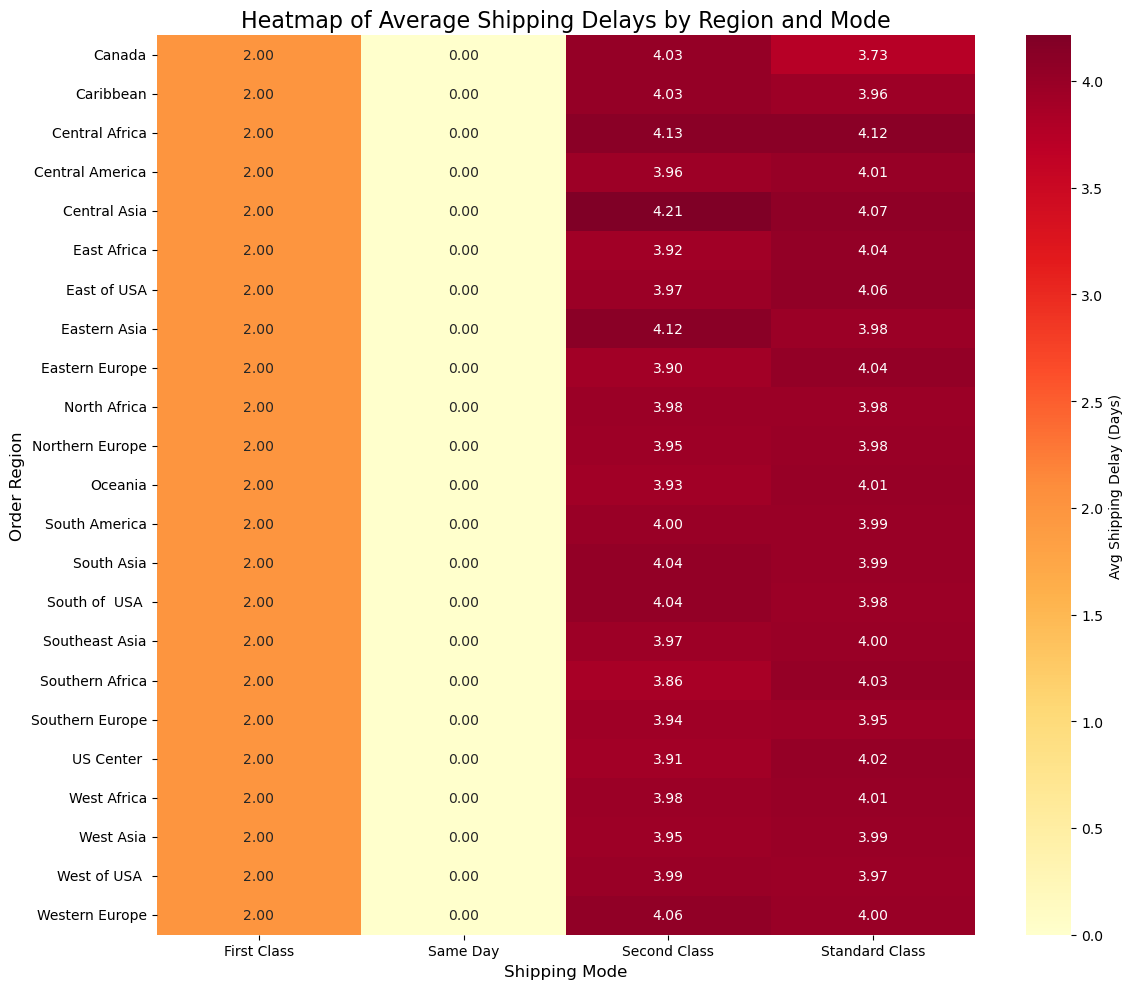

In [2]:
# Visual 2: Heatmap of average shipping delays by country 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Check columns and counts

print("Unique Order Regions:", df['Order Region'].nunique())
print("Unique Shipping Modes:", df['Shipping Mode'].nunique())

# Create a pivot table for the heatmap: Order Region vs Shipping Mode
# This highlights which combinations are "bottlenecks"
heatmap_data = df.pivot_table(index='Order Region', columns='Shipping Mode', values='shipping_delay', aggfunc='mean')

# Plotting the heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Avg Shipping Delay (Days)'})

plt.title('Heatmap of Average Shipping Delays by Region and Mode', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Order Region', fontsize=12)
plt.tight_layout()
plt.savefig('shipping_delay_heatmap.png')

# Save the heatmap data for the user

heatmap_data.to_csv('shipping_delay_heatmap_data.csv')

Correlation between Cost and Sales: 0.7899


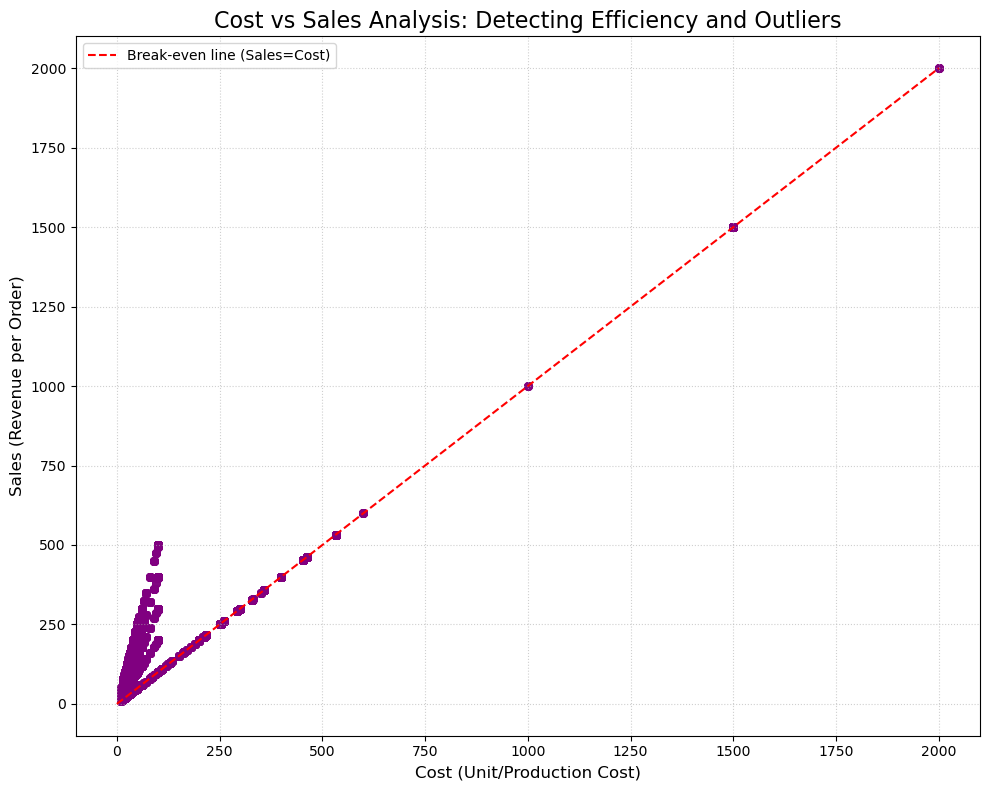

In [3]:
# Visual 3: Scatter Plot showing cost vs sales comparison 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Visualization: Scatter Plot Cost vs Sales

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Cost', y='Sales', alpha=0.3, color='purple', edgecolor=None)

# Adding a 1:1 reference line (where Sales = Cost)

max_val = max(df['Cost'].max(), df['Sales'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Break-even line (Sales=Cost)')

plt.title('Cost vs Sales Analysis: Detecting Efficiency and Outliers', fontsize=16)
plt.xlabel('Cost (Unit/Production Cost)', fontsize=12)
plt.ylabel('Sales (Revenue per Order)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig('cost_vs_sales_scatter.png')

# Statistical correlation

correlation = df['Cost'].corr(df['Sales'])
print(f"Correlation between Cost and Sales: {correlation:.4f}")

Columns in dataset: ['ï»¿"Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Cust_City', 'Cust_Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'Order_Date', 'Order_id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Qnty', 'Sales', 'Order Item Total', 'Profit', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product_Category', 'Product Description', 'Product Image', 'Product Name', 'Cost', 'Product Status', 'Shipping_Date', 'Shipping Mode', 'shipping_delay']
Top 10 Custo

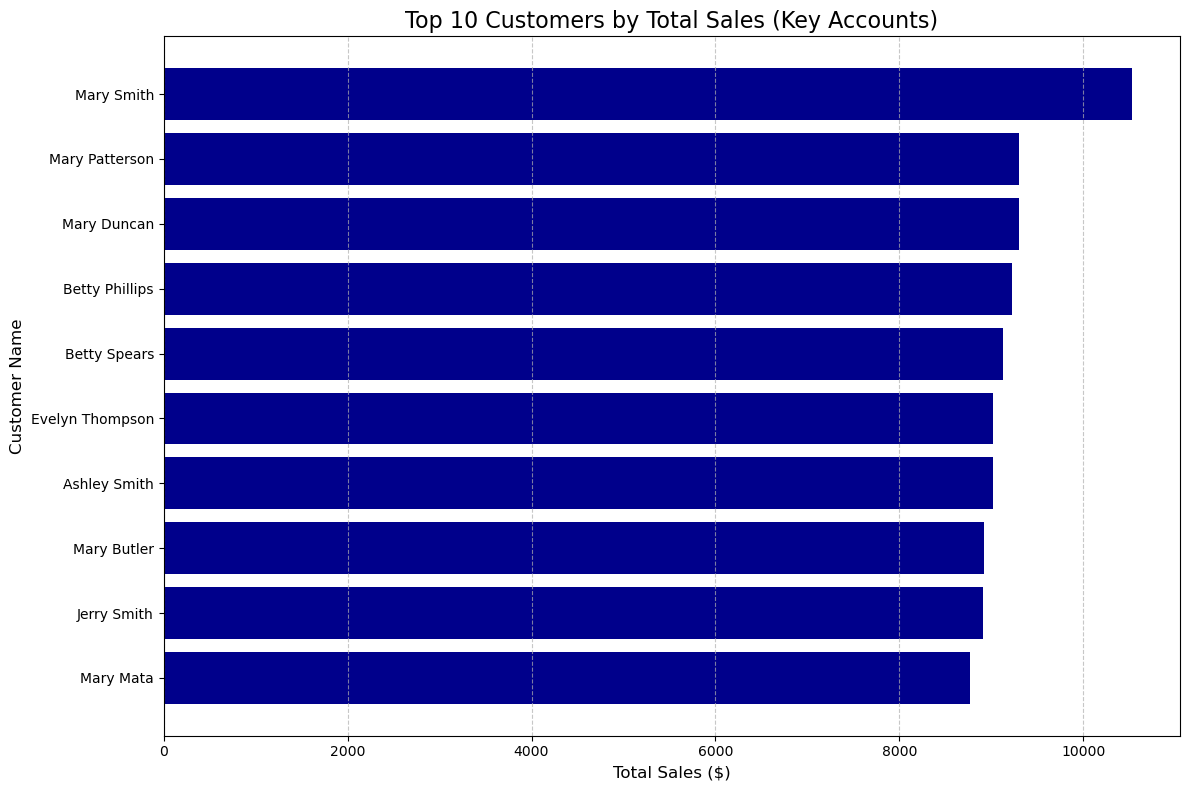

In [4]:
# visual 4: Barchart Showing Top Customer by Sales

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Look for customer name columns
# Based on the original structure, they were 'Customer Fname' and 'Customer Lname'
# Let's verify columns first

print("Columns in dataset:", df.columns.tolist())

# Combine First and Last names for the chart labels
# We'll use 'Customer Id' as the primary key just in case names are duplicated

df['Customer_Full_Name'] = df['Customer Fname'].astype(str) + ' ' + df['Customer Lname'].astype(str)

# Group by Customer Id and Name, then sum Sales

customer_sales = df.groupby(['Customer Id', 'Customer_Full_Name'])['Sales'].sum().reset_index()

# Sort and get the top 10

top_10_customers = customer_sales.sort_values(by='Sales', ascending=False).head(10)

# Create the Bar Chart

plt.figure(figsize=(12, 8))
plt.barh(top_10_customers['Customer_Full_Name'], top_10_customers['Sales'], color='darkblue')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.title('Top 10 Customers by Total Sales (Key Accounts)', fontsize=16)
plt.gca().invert_yaxis()  # Put the highest sales at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_customers_sales.png')

# Save the top 10 list

top_10_customers.to_csv('top_10_customers_summary.csv', index=False)

print("Top 10 Customers by Sales:")
print(top_10_customers[['Customer_Full_Name', 'Sales']])

C:\Users\srava\AppData\Local\Temp\ipykernel_16532\2903834174.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Product_Category', y='Profit_Margin', palette='Set3')


Profit Margin Stats (First 5 categories):
                    count      mean       std       min       25%       50%  \
Product_Category                                                              
9                 12487.0  0.106220  0.423793 -2.749995  0.062377  0.241791   
13                 1127.0  0.113870  0.409139 -2.591956  0.060791  0.241951   
17                24551.0  0.111860  0.412181 -2.750000  0.063011  0.243040   
18                22246.0  0.107859  0.425530 -2.749981  0.062389  0.243788   
24                21035.0  0.110003  0.418787 -2.700000  0.062200  0.243000   

                       75%       max  
Product_Category                      
9                 0.334613  0.500050  
13                0.332855  0.500111  
17                0.336014  0.500083  
18                0.337487  0.500038  
24                0.336000  0.500000  


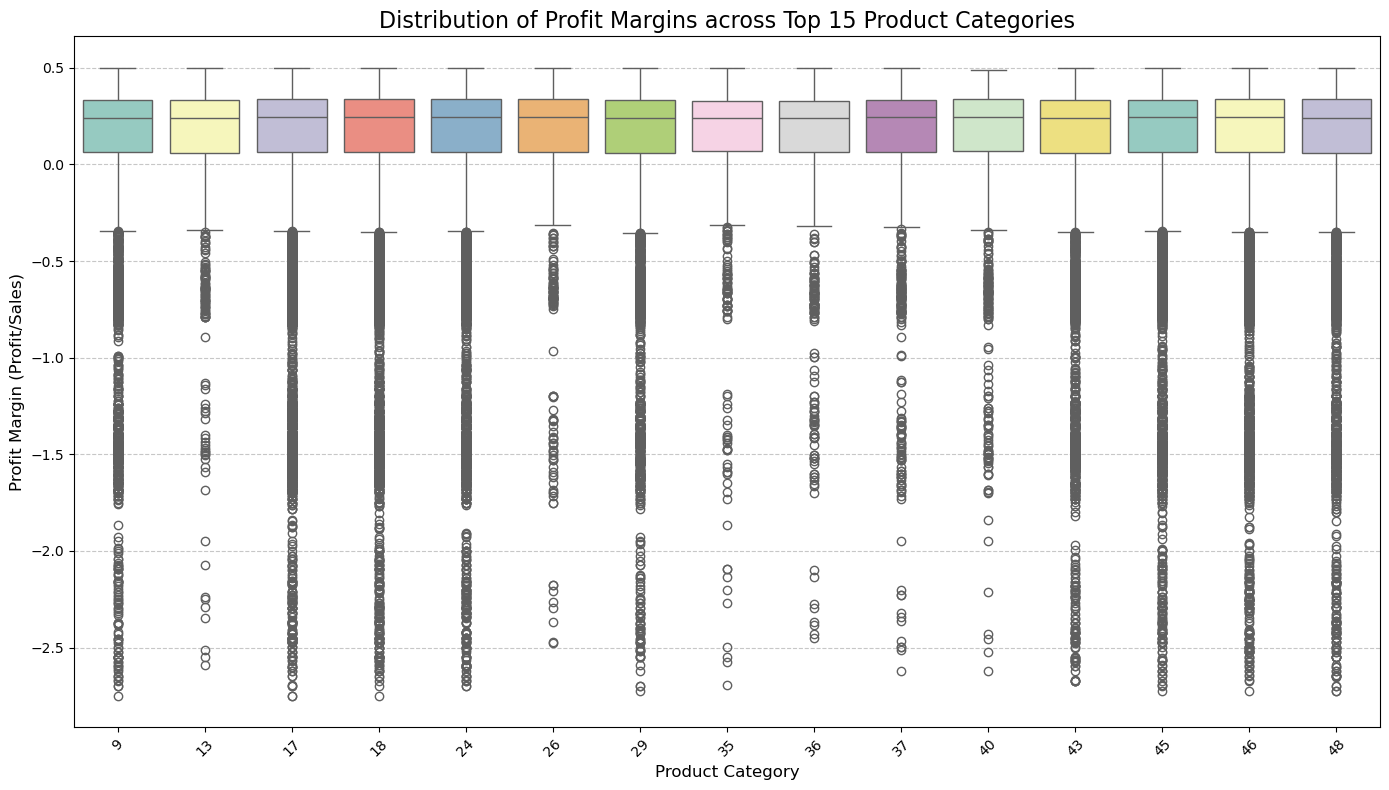

In [5]:
# visual 5 : Box Plot for profit margin analysis 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Calculate Profit Margin
# Avoid division by zero

df['Profit_Margin'] = df['Profit'] / df['Sales'].replace(0, float('nan'))

# Get top 15 categories by order frequency to keep the plot readable

top_categories = df['Product_Category'].value_counts().nlargest(15).index
df_filtered = df[df['Product_Category'].isin(top_categories)]

# Create the Boxplot

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='Product_Category', y='Profit_Margin', palette='Set3')

plt.title('Distribution of Profit Margins across Top 15 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Profit Margin (Profit/Sales)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('profit_margin_boxplot.png')

# Statistical summary of profit margins for these categories

margin_stats = df_filtered.groupby('Product_Category')['Profit_Margin'].describe()
margin_stats.to_csv('profit_margin_statistics.csv')

print("Profit Margin Stats (First 5 categories):")
print(margin_stats.head())